# 1. Import and Install Dependencies


In [1]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt
import time          
import mediapipe as mp  #pour la detection de corps

# 2. Points clés utilisant MP Holistic

In [2]:
# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils


In [3]:
def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results


In [4]:
def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    

In [5]:
def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    

In [6]:
# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)


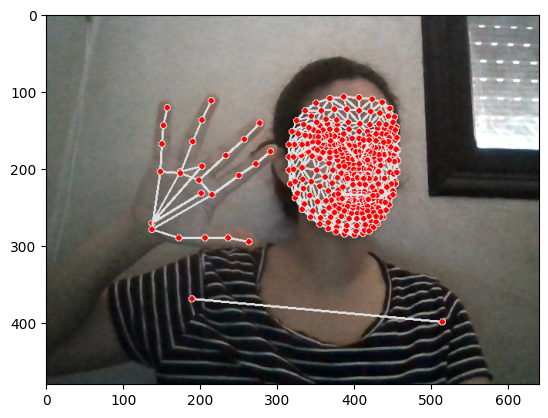

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extraire les valeurs des points clés

In [11]:
pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [12]:
# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [13]:
def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])


In [14]:
face

array([ 0.63641512,  0.48182738, -0.03282197, ...,  0.6945253 ,
        0.34556082,  0.03985544])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test


array([ 0.63555139,  0.40503132, -1.23893356, ...,  0.2454861 ,
        0.25257498, -0.11977615])

In [17]:
extract_keypoints(results).shape

(1662,)

In [18]:
468*3+33*4+21*3+21*3


1662

In [19]:
np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions

In [20]:
np.load('0.npy')


array([ 0.63555139,  0.40503132, -1.23893356, ...,  0.2454861 ,
        0.25257498, -0.11977615])

# 4. Configurer les dossiers pour la collecte

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar','Waqtach',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30

In [22]:
# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



In [23]:
# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass


In [24]:
action

'chof'

# 5. Collectez les valeurs des points clés pour la formation et les tests

In [25]:
# Ouvre une connexion à la caméra (0 pour la caméra par défaut)
cap = cv2.VideoCapture(0)

# Initialise le modèle MediaPipe avec les seuils de confiance pour la détection et le suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Boucle à travers chaque action définie
    for action in actions:
        # Boucle à travers chaque séquence (vidéo) pour l'action actuelle
        for sequence in range(no_sequences):
            # Boucle à travers chaque frame de la séquence (longueur de la séquence)
            for frame_num in range(sequence_length):

                # Lit un frame de la caméra
                ret, frame = cap.read()

                # Effectue la détection des points de repère avec le modèle MediaPipe
                image, results = mediapipe_detection(frame, holistic)
                # print(results)  # (Commenté) Affiche les résultats de la détection

                # Dessine les points de repère stylisés sur l'image
                draw_styled_landmarks(image, results)
                
                # Applique une logique d'attente pour afficher un message
                if frame_num == 0: 
                    # Affiche un message indiquant le début de la collecte de données
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    # Affiche des informations supplémentaires sur la collecte des frames
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Affiche l'image avec les messages à l'écran
                    cv2.imshow('OpenCV Feed', image)
                    # Attend 2 secondes avant de passer à la frame suivante
                    cv2.waitKey(2000)
                else: 
                    # Affiche uniquement les informations sur la collecte des frames
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Affiche l'image avec les messages à l'écran
                    cv2.imshow('OpenCV Feed', image)
                
                # Extrait les points de repère clés à partir des résultats de la détection
                keypoints = extract_keypoints(results)
                # Crée un chemin de fichier pour sauvegarder les points de repère extraits
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # Sauvegarde les points de repère dans un fichier .npy
                np.save(npy_path, keypoints)

                # Permet de quitter la boucle en appuyant sur la touche 'q'
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    # Libère la caméra et ferme toutes les fenêtres d'affichage OpenCV
    cap.release()
    cv2.destroyAllWindows()


In [26]:
cap.release()
cv2.destroyAllWindows()

# 6. Prétraite les données et crée des étiquettes et des fonctionnalités

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  


In [28]:
label_map = {label:num for num, label in enumerate(actions)}


In [29]:
label_map

{'n3ass': 0,
 'lunettes': 1,
 'je froid': 2,
 '3aslama': 3,
 'Chokran': 4,
 'Nhebbek': 5,
 'La': 6,
 'j aime': 7,
 'j aime pas': 8,
 'Nakel': 9,
 'Nchrob': 10,
 'Bahi': 11,
 'Telephone': 12,
 's il te plait': 13,
 'pleur': 14,
 'fort': 15,
 'lissar': 16,
 'Waqtach': 17,
 'Limine': 18,
 'sghir': 19,
 'kbir': 20,
 'stop': 21,
 'sma3ni': 22,
 'fakar': 23,
 'chof': 24}

In [30]:
# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


In [31]:
action

'chof'

In [32]:
np.array(sequences).shape

(750, 30, 1662)

In [33]:
np.array(labels).shape

(750,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(750, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(38, 25)

# 7. Construire et former un réseau neuronal LSTM

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [41]:

# Définit le chemin du répertoire où les journaux TensorBoard seront sauvegardés
log_dir = os.path.join('Logs')

# Crée une instance de TensorBoard pour enregistrer les journaux d'entraînement dans le répertoire spécifié
tb_callback = TensorBoard(log_dir=log_dir)


In [42]:
# Crée un modèle séquentiel
model = Sequential()

# Ajoute une couche LSTM avec 64 unités, renvoie les séquences (True) pour la connexion avec la couche suivante,
# utilise la fonction d'activation ReLU et spécifie la forme d'entrée de (40, 1662)
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(40,1662)))

# Ajoute une deuxième couche LSTM avec 128 unités, renvoie les séquences (True) pour la connexion avec la couche suivante,
# utilise la fonction d'activation ReLU
model.add(LSTM(128, return_sequences=True, activation='relu'))

# Ajoute une troisième couche LSTM avec 64 unités, ne renvoie pas les séquences (False),
# utilise la fonction d'activation ReLU
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Ajoute une couche Dense avec 64 unités et la fonction d'activation ReLU
model.add(Dense(64, activation='relu'))

# Ajoute une couche Dense avec 32 unités et la fonction d'activation ReLU
model.add(Dense(32, activation='relu'))

# Ajoute une couche Dense finale avec un nombre d'unités égal au nombre d'actions,
# avec la fonction d'activation softmax pour la classification multi-classe
model.add(Dense(actions.shape[0], activation='softmax'))


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# 'res' contient les probabilités de prédiction pour trois classes.
# Les valeurs représentent la probabilité que l'entrée appartienne à chaque classe respective.
# Ici, 0.7 indique la probabilité la plus élevée pour la première classe,
# suivie de 0.2 pour la deuxième classe, et 0.1 pour la troisième classe.
res = [.7, 0.2, 0.1]


In [44]:
actions[np.argmax(res)]

'n3ass'

In [45]:
# Compile le modèle en spécifiant l'optimiseur, la fonction de perte et les métriques à utiliser pendant l'entraînement
model.compile(
    optimizer='Adam',                # Utilise l'optimiseur Adam, qui est un algorithme d'optimisation adaptatif couramment utilisé pour la formation des réseaux de neurones
    loss='categorical_crossentropy', # Spécifie la fonction de perte comme l'entropie croisée catégorique, appropriée pour les problèmes de classification multi-classe où les étiquettes sont encodées en one-hot
    metrics=['categorical_accuracy']  # Utilise la précision catégorique comme métrique d'évaluation pour suivre la performance du modèle pendant l'entraînement et l'évaluation
)


In [46]:
model.fit(X_train, y_train, epochs=800, callbacks=[tb_callback])

Epoch 1/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - categorical_accuracy: 0.0384 - loss: 3.3774
Epoch 2/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - categorical_accuracy: 0.0725 - loss: 3.0883
Epoch 3/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.0744 - loss: 3.1112
Epoch 4/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.1110 - loss: 2.9486
Epoch 5/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - categorical_accuracy: 0.1669 - loss: 2.7652
Epoch 6/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - categorical_accuracy: 0.1391 - loss: 2.8626
Epoch 7/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - categorical_accuracy: 0.1574 - loss: 2.8325
Epoch 8/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.1074 - loss: 3.1656
Epoch 9/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.1637 - loss: 2.7329
Epoch 10/800
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - categorical_accuracy: 0.2046 - loss: 2.3830
Epoch 11/800
23/23 

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 40, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 40, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792,205 (6.84 MB)

 Trainable params: 597,401 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,194,804 (4.56 MB)

In [48]:
# using media pipe holistic model in this particular case that our data is going to be able to fit into memory
# so we dont need to build a data generator to be able to build up a pipeline of data

# 8. Make Predictions

In [49]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


In [50]:
actions[np.argmax(res[4])]

'Telephone'

In [51]:
actions[np.argmax(y_test[4])]

'Waqtach'

# 9. Économisez du poids

In [52]:
model.save('action.h5')

In [53]:
# del model

In [54]:
# Charge les poids préalablement sauvegardés dans le fichier 'action.h5' dans le modèle
model.load_weights('action.h5')


# 10. Évaluation à l'aide de la matrice de confusion et de la précision

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [57]:
# convertit les prédictions de leur représentation codée à chaud en une étiquette catégorielle, par exemple 0,1,2 sous la forme [1,0,0],[0,1,0],[0,0,1]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[36.,  0.],
        [ 2.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[36.,  0.],
        [ 2.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[35.,  0.],
        [ 3.,  0.]],

       [[33.,  0.],
        [ 5.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[ 0., 38.],
        [ 0.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[34.,  0.],
        [ 4.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[35.,  0.],
        [ 3.,  0.]],

       [[36.,  0.],
        [ 2.,  0.]],

       [[37.,  0.],
        [ 1.,  0.]],

       [[32.,  0.],
        [ 6.,  0.]]])

In [59]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test en temps réel

In [60]:
colors = [(245,117,16), (117,245,16), (16,117,245)]* (len(actions) // 3 + 1)
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [61]:
#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

In [62]:
# sequence.reverse()

sequences = np.array(sequences, dtype=np.float32)  # Assurez-vous que toutes les séquences sont en float32
sequences = sequences[::-1]  # Reverses the entire sequences array

print(sequences)

[[[ 0.5160182   0.4524754  -1.0802364  ...  0.45198488  0.69363344
   -0.00785414]
  [ 0.5160037   0.4525295  -1.067734   ...  0.45351848  0.6975571
   -0.01019249]
  [ 0.5159935   0.45164716 -1.1196542  ...  0.45211238  0.69272876
   -0.00923952]
  ...
  [ 0.51605225  0.4523972  -1.1294849  ...  0.4531132   0.69589317
   -0.00204419]
  [ 0.5160483   0.452478   -1.1026971  ...  0.4511778   0.7013948
   -0.00705594]
  [ 0.516053    0.45250475 -1.1198027  ...  0.45517576  0.700079
   -0.00563149]]

 [[ 0.51374215  0.4563693  -1.1570764  ...  0.4525665   0.69688743
   -0.00573525]
  [ 0.5136515   0.4536169  -1.1316112  ...  0.44940856  0.68914217
   -0.01146954]
  [ 0.51458037  0.45280463 -1.1231663  ...  0.45195127  0.6892089
   -0.0045726 ]
  ...
  [ 0.5159159   0.45236513 -1.1198636  ...  0.44984734  0.694088
   -0.01629725]
  [ 0.5159333   0.45235026 -1.1080568  ...  0.45124978  0.69292927
   -0.00805763]
  [ 0.51588714  0.45240363 -1.1216     ...  0.45065275  0.6950686
   -0.00725913

In [63]:
# len(sequence)

sequences = np.array(sequences, dtype=np.float32)  # Ensure all sequences are in float32
for seq in sequences:
    print(len(seq))

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
3

In [64]:
# sequence.append('def')

# Append 'def' to the numpy array
sequence = np.append(sequence, 'def')
print(sequence)


['29' 'def']


In [65]:
#sequence.reverse()
sequences = sequences[::-1] 

In [66]:
sequence[-40:]

array(['29', 'def'], dtype='<U11')

In [67]:
# 1. Variables pour la détection des gestes
sequence = []            # Liste pour stocker les séquences de points clés
sentence = []            # Liste pour stocker les actions détectées successivement
predictions = []        # Liste pour stocker les prédictions du modèle
threshold = 0.8          # Seuil de confiance pour valider une prédiction

# Ouvrir la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Initialiser le modèle Mediapipe pour la détection des gestes
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire une image du flux vidéo
        ret, frame = cap.read()

        # Effectuer des détections sur l'image
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les repères sur l'image
        draw_styled_landmarks(image, results)
        
        # 2. Logique de prédiction
        keypoints = extract_keypoints(results)  # Extraire les points clés de l'image
        sequence.append(keypoints)             # Ajouter les points clés à la séquence
        sequence = sequence[-20:]              # Conserver seulement les 20 derniers frames
        
        if len(sequence) == 20:                # Si la séquence contient 20 frames
            res = model.predict(np.expand_dims(sequence, axis=0))[0]  # Prédire l'action à partir de la séquence
            print(actions[np.argmax(res)])    # Afficher l'action prédite
            predictions.append(np.argmax(res))  # Ajouter la prédiction à la liste des prédictions
            
            # 3. Logique de visualisation
            if np.unique(predictions[-10:])[0] == np.argmax(res):  # Si la prédiction dominante sur les 10 derniers frames est constante
                if res[np.argmax(res)] > threshold:  # Vérifier si la probabilité est au-dessus du seuil
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:  # Ajouter l'action à la sentence si elle est différente de la précédente
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])  # Ajouter la première action détectée à la sentence

            if len(sentence) > 5:  # Limiter la taille de la sentence à 5 actions
                sentence = sentence[-5:]

            # Visualiser les probabilités de chaque action
            image = prob_viz(res, actions, image, colors)
            
        # Dessiner un fond coloré et ajouter le texte de la sentence sur l'image
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Afficher l'image avec les visualisations
        cv2.imshow('OpenCV Feed', image)

        # Quitter la boucle lorsque la touche 'q' est pressée
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer toutes les fenêtres ouvertes
cap.release()
cv2.destroyAllWindows()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [68]:
cap.release()
cv2.destroyAllWindows()

In [69]:
res[np.argmax(res)] > threshold

False

In [70]:
# (num_sequences,30,1662)

In [71]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.03930794, 0.04067479, 0.0409263 , 0.03935931, 0.04207184,
        0.04079496, 0.0405892 , 0.04067557, 0.03789991, 0.03491082,
        0.04069467, 0.04064061, 0.04226093, 0.04094769, 0.03644255,
        0.04119401, 0.04205532, 0.04112549, 0.04168402, 0.03781859,
        0.03901998, 0.04222252, 0.04191692, 0.04078423, 0.03398186]],
      dtype=float32)